# Practical session 2 - Practise with classic libraries

Students (pair):
- [Jérémy Jean](https://github.com/heez77)
- [Maxime Gey](https://github.com/Purjack)

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [2]:
import numpy as np
import h5py
np.random.default_rng(84548)
alpha, beta, rng = 9, 2, 

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [3]:
samples = rng.gamma(alpha,1/beta, 10**5)
with open('data/samples.npy', 'wb') as f:
    np.save(f, samples)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

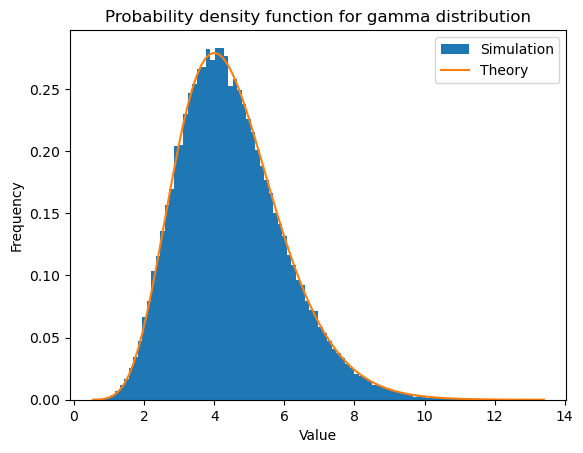

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def display_fig_gamma(samples:np.array):
    """This function plot a figure with the pdf of gamma distribution and the histogram based on samples given by samples.

    Args:
        samples (np.array): A vector of generated samples from gamma distribution
    """
    counts, bins = np.histogram(samples, bins=100, density=True)
    y = stats.gamma.pdf(bins, a=alpha, scale=(1/beta))
    
    plt.hist(bins[:-1], bins, weights=counts, label="Simulation")
    
    plt.plot(bins, y, label='Theory')
    plt.title('Probability density function for gamma distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    
    plt.savefig("figures/pdf_distribution_gamma.png")
    
    plt.show()

display_fig_gamma(samples)

<u>Interpretation</u> The distribution fits the theoretical expression of the pdfs's gamma distribution.

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [5]:
import pandas as pd

df = pd.read_csv("data/data.csv")
df.sort_values(by='X', inplace=True)

print(df.X.describe())
print()
print(df.Y.describe())

count     12.00000
mean     153.75000
std       59.04255
min       56.00000
25%      107.00000
50%      180.50000
75%      193.25000
max      233.00000
Name: X, dtype: float64

count    12.000000
mean     25.916667
std       6.515134
min      18.000000
25%      21.500000
50%      24.000000
75%      29.500000
max      37.000000
Name: Y, dtype: float64


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [6]:
from numpy.polynomial import Polynomial

f = Polynomial.fit(df.X.to_numpy(), df.Y.to_numpy(), deg=1)

In [7]:
print(f"On obtient la régression linéaire suivante : {f}")

On obtient la régression linéaire suivante : 26.824690593387018 - 8.687580271864917 x**1


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

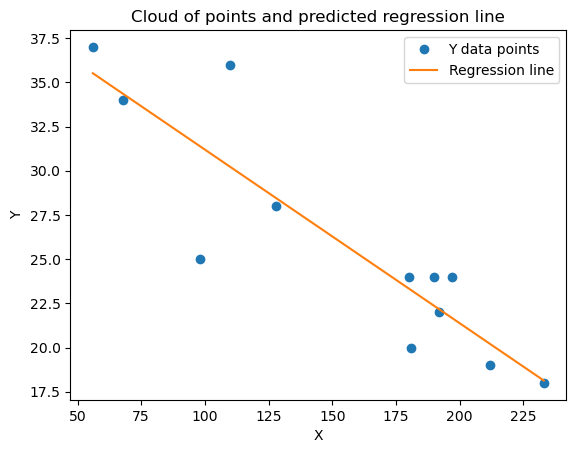

In [8]:
plt.figure()
plt.plot(df.X, df.Y, marker='o', linestyle="None", label="Y data points")
plt.plot(df.X, f(df.X), label="Regression line")
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.title('Cloud of points and predicted regression line')
plt.savefig("figures/regression.png")

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [65]:
from numpy import newaxis

def gradient2D(X:np.array)->(np.array, np.array):
    """This function computes the 2D discrete gradient operator D applied to a matrix X of dimensions 1 or 2

    Args:
        X (np.array):A matrix in C^(M,N)

    Returns:
        (np.array,np.array) : Two matrix in C^(M,N)
    """
    assert X.ndim <=2, "The input array has more than 2 dimensions"

    XDh = np.zeros(X.shape)
    for n in range(2,XDh.shape[1]):
        XDh[:,n-2] = X[:,n]-X[:,n-1]

    DvX = np.zeros(X.shape)
    for m in range(2,XDh.shape[0]):
        DvX[m-2,:] = X[m,:]-X[m-1,:]


    return XDh, DvX

In [ ]:
 assert X.ndim <=2, "The input array has more than 2 dimensions"
    
    XDh = np.zeros(X.shape)
    for n in range(2,XDh.shape[0]):
        XDh[:,n-2] = X[:,n]-X[:,n-1]
    
    Dvx = np.zeros(X.shape)
    for m in range(2,XDh.shape[1]):
        DvX[m-2,:] = X[m,:]-X[m-1,:]
    DvX = np.stack(DvX, axis=0)
    DvX = np.append(DvX, np.array([[0 for _ in range(DvX.shape[1])]]), axis=0)
    
    DX = np.stack((XDh, DvX), axis=2)
    return DX

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [14]:
import unittest

class Test_TestGradient2D(unittest.TestCase):
    def test_gradient2D_square(self):
        N = 6
        X1 = np.array([[(j**2)*(i**2) for i in range(1,N+1)] for j in range(1,N+1)])
        DX1 = gradient2D(X1)
        self.assertCountEqual([DX1.shape[0], DX1.shape[1], DX1.shape[2]], [N, N, 2])

    def test_gradient2D_non_square(self):
        M=10
        N=6
        X2 = np.array([[(j**2)*(i**2) for i in range(1,N+1)] for j in range(1,M+1)])
        DX2 = gradient2D(X2)
        self.assertCountEqual([DX2.shape[0], DX2.shape[1], DX2.shape[2]], [M, N, 2])

We create a folder src with the code and a folder tests with the test and obtain the results : 


<center> <img src="figures/screenshot_test_gradient2d.PNG" alt="test result" width="800px"> </center>

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

Done directly in the previous question

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [17]:
def tv(X:np.array)->float:
    """This function compute the discrete isotropic total variation of an input matrix in C^(M,N)

    Args:
        X (np.array): A matrix in C^(MxN)

    Returns:
        float: returns the value of the TV for the input matrix X
    """
    DX = gradient2D(X)
    sum = 0
    for m in range(DX.shape[0]):
        for n in range(DX.shape[1]):
            sum+= np.sqrt(DX[m,n,0]**2 + DX[m,n,1]**2)
    return sum

In [ ]:
class Test_TestTV(unittest.TestCase):
    def test_TV_square(self):
        N = 6
        X1 = np.array([[(j**2)*(i**2) for i in range(1,N+1)] for j in range(1,N+1)])
        self.assertIsInstance(tv(X1), float)

    def test_TV_non_square(self):
        M=10
        N=6
        X2 = np.array([[(j**2)*(i**2) for i in range(1,N+1)] for j in range(1,M+1)])
        self.assertIsInstance(tv(X2), float)

    def test_TV_constant(self):
        M=10
        N=6
        C=24
        X3 = np.full((M,N),C)
        self.assertEqual(tv(X3), 0)

<center> <img src="figures/screenshot_test_TV.PNG" alt="test result" width="800px"> </center>

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

In [61]:
def gradient2D_adjoint(Y):
    (Yh, Yv) = Y
    YhDh = np.zeros(Yh.shape)
    DvYv = np.zeros(Yv.shape)
    
    YhDh[:,0] = - Yh[:,1]
    YhDh[:,-1] = Yh[:,-1]
    for n in range(2,Yh.shape[1]):
        YhDh[:, n-1] = -(Yh[:,n]- Yh[:,n-1])
        
    DvYv[0,:] = - Yv[1, :]
    DvYv[-1,:] =  Yv[-1, :]
    for m in range(2, Yv.shape[0]):
        DvYv[m-1,:] = - (Yv[m, :]  - Yv[m-1, :])
        
    D_adjoint = YhDh + DvYv
    return D_adjoint


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [58]:
class Test_TestGradient_2D_adjoint(unittest.TestCase):
    def test_gradient2D_adjoint_shape_square(self):
        rng = np.random.default_rng(84548)
        N = rng.integers(low=2, high=20, size = 1)[0]
        Yh1, Yv1 = rng.random((N,N)), rng.random((N,N))
        D_adjoint = gradient2D_adjoint((Yh1, Yv1))

        self.assertCountEqual([D_adjoint.shape[0], D_adjoint.shape[1]], [Yh1.shape[0], Yh1.shape[1]])

    def test__gradient2D_adjoint_shape_non_square(self):
        rng = np.random.default_rng(84548)
        M,N = rng.integers(low=2, high=20, size = 2)
        Yh2, Yv2 = rng.random((M,N)), rng.random((M,N))
        D_adjoint = gradient2D_adjoint((Yh2, Yv2))

        self.assertCountEqual([D_adjoint.shape[0], D_adjoint.shape[1]], [Yh2.shape[0], Yv2.shape[1]])

    def test_gradient2D_adjoint_equation(self):
        rng = np.random.default_rng(84548)
        M,N = rng.integers(low=2, high=20, size = 2)
        X3, Yh3, Yv3 = rng.random((M,N)), rng.random((M,N)), rng.random((M,N))
        DX3 = gradient2D(X3)
        XDh3, DvX3 = DX3[:,:,0], DX3[:,:,1]
        D_adjointY3 = gradient2D_adjoint((Yh3, Yv3))
        self.assertEqual(np.trace(XDh3.T @ Yh3) + np.trace(DvX3.T @ Yv3), np.trace(X3.T @ D_adjointY3))

In [62]:
rng = np.random.default_rng(84548)
M,N = rng.integers(low=2, high=20, size = 2)
X3, Yh3, Yv3 = rng.random((M,N)), rng.random((M,N)), rng.random((M,N))
DX1 = gradient2D(X3)


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [ ]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
